In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import geopandas as gpd
import re
import os

In [6]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/Tsediment/TukIsland_processedCSV'

In [7]:
events = {}
for filename in os.listdir(dir):
    match = re.match(r'event(\d+)\.csv$', filename)
    if match:
        event_number = int(match.group(1))  # Extract number as an integer
        events[event_number] = pd.read_csv(os.path.join(dir, filename))

In [8]:
def plot_all_events_with_styles(event_numbers_group1, event_numbers_group2, title):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    plt.rcParams['font.family'] = 'Arial'
    plt.style.use('seaborn-v0_8-colorblind')
    # Plot the first group with solid lines
    for event_number in event_numbers_group1:
        if event_number in events:
            df = events[event_number]
            depth_col = 'depth_cm'
            temp_cols = [col for col in df.columns if col.startswith('soilTemp_degC')]
            
            for col in temp_cols:
                plt.plot(df[col], df[depth_col], label=f'Event {event_number} - {col}', linestyle='-')

    # Plot the second group with dashed lines
    for event_number in event_numbers_group2:
        if event_number in events:
            df = events[event_number]
            depth_col = 'depth_cm'
            temp_cols = [col for col in df.columns if col.startswith('soilTemp_degC')]
            
            for col in temp_cols:
                plt.plot(df[col], df[depth_col], label=f'Event {event_number} - {col}', linestyle='--')

    plt.gca().invert_yaxis()  # Invert y-axis if depth increases downward
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Depth (cm)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()
    plt.show()


In [9]:
events

{46:     depth_cm  soilTemp_degC
 0          0           2.88
 1          5           3.01
 2         10           3.07
 3         15           3.12
 4         20           3.15
 5         25           3.14
 6         30           3.19
 7         35           3.16
 8         40           3.14
 9         45           3.09
 10        50           3.03
 11        55           2.98
 12        60           2.88
 13        65           2.81
 14        70           2.67
 15        75           2.60
 16        80           2.42
 17        85           2.25
 18        90           2.05
 19        95           1.84
 20       100           1.65
 21       105           1.44
 22       110           1.23
 23       115           1.01,
 47:     depth_cm  soilTemp_degC
 0          0           3.53
 1          5           3.43
 2         10           3.37
 3         15           3.42
 4         20           3.45
 5         25           3.52
 6         30           3.60
 7         35           3.62
 8   

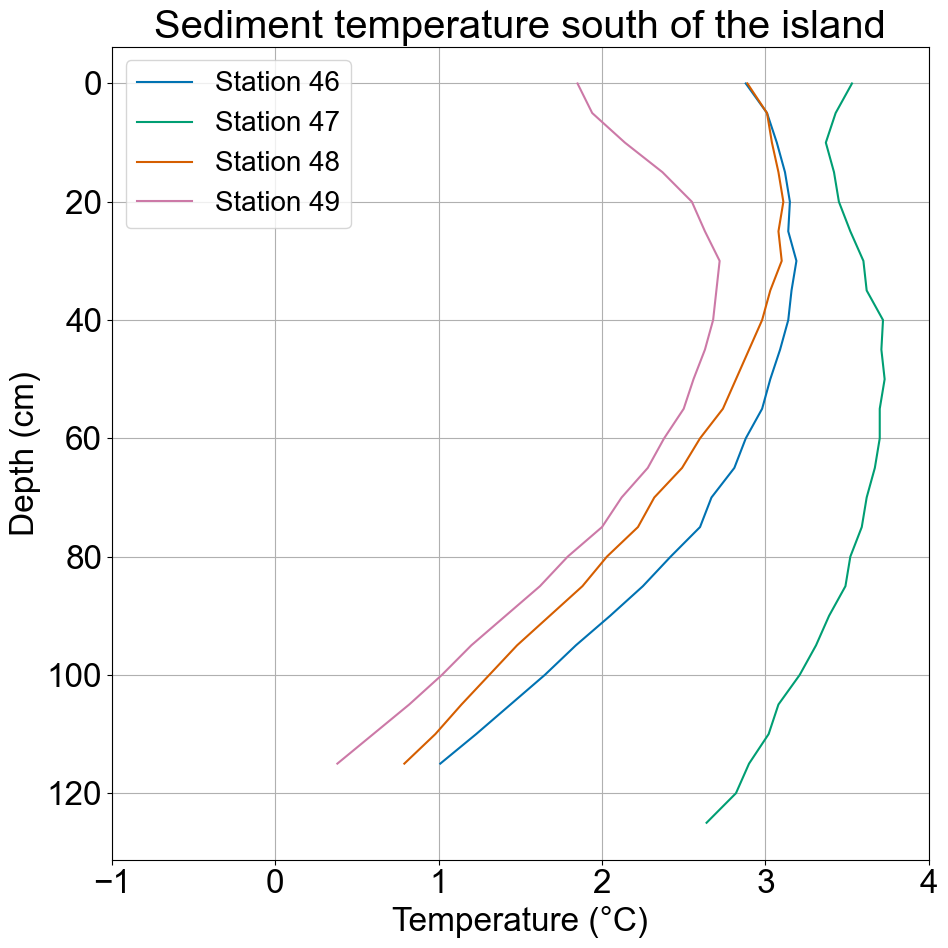

In [56]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['font.size'] = 24

for k in range(46, 50):
    df = events[k]
    plt.plot(df['soilTemp_degC'], df['depth_cm'], label=f'Station {k}')

ax = plt.gca()
ax.invert_yaxis()  # Invert y-axis if depth increases downward
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (cm)')
ax.set_xlim(-1, 4)
plt.title('Sediment temperature south of the island')
plt.legend(fontsize='small')
plt.tight_layout()
plt.grid(True)    

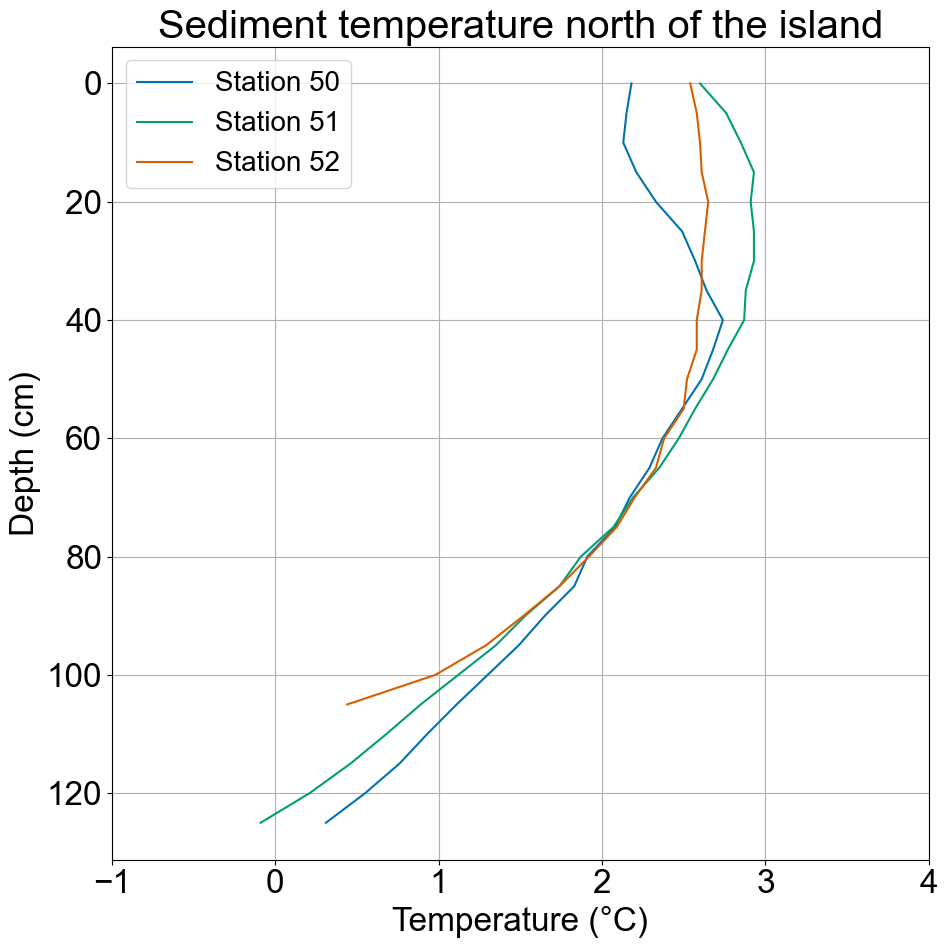

In [55]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['font.size'] = 24

for k in range(50, 53):
    df = events[k]
    plt.plot(df['soilTemp_degC'], df['depth_cm'], label=f'Station {k}')

ax = plt.gca()
ax.invert_yaxis()  # Invert y-axis if depth increases downward
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (cm)')
ax.set_xlim(-1, 4)
plt.title('Sediment temperature north of the island')
plt.legend(fontsize='small')
plt.tight_layout()
plt.grid(True)    

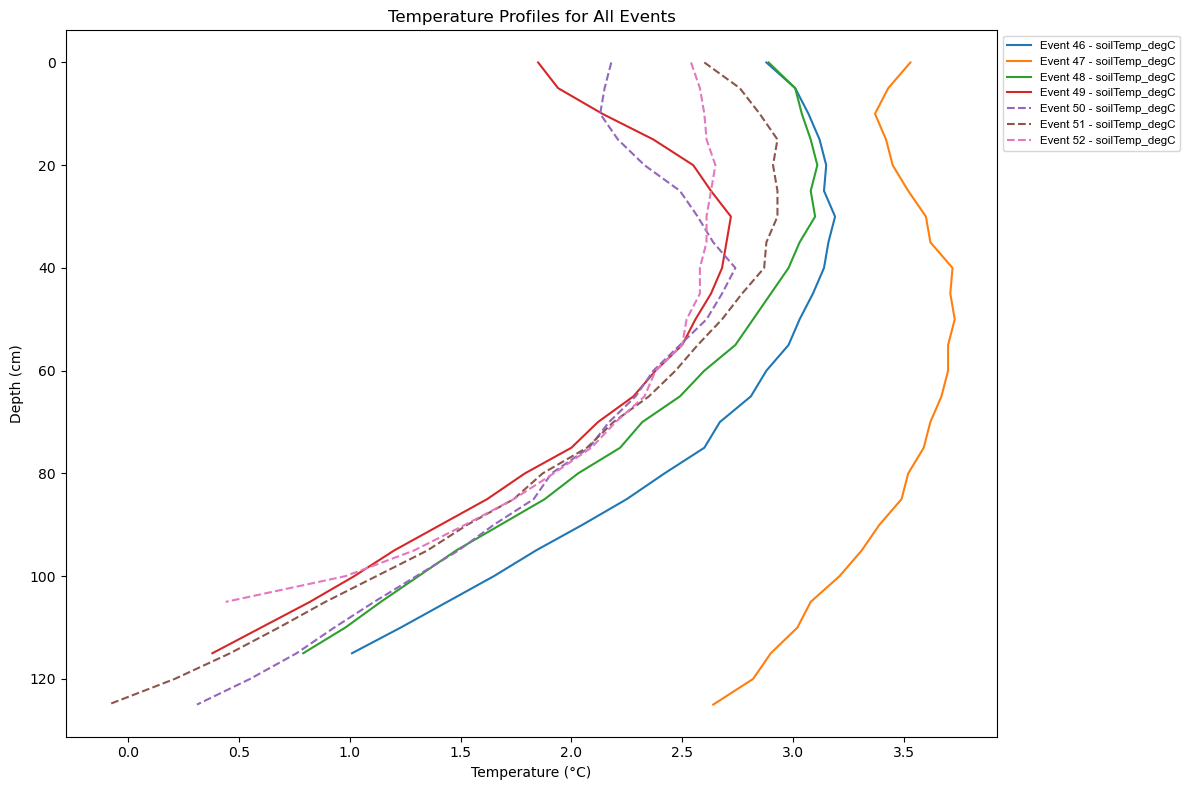

In [34]:
# Define event groups
event_numbers_group1 = range(46, 50)
event_numbers_group2 = range(50, 53)

# Plot all events with different line styles
plot_all_events_with_styles(event_numbers_group1, event_numbers_group2, 'Temperature Profiles for All Events')

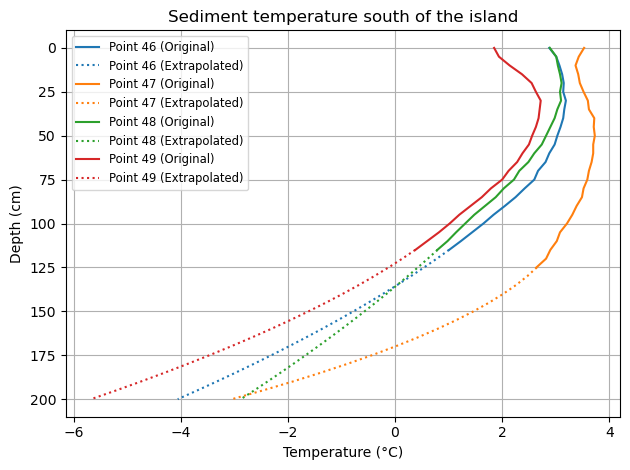

In [107]:
from scipy.interpolate import splrep, splev
#plt.figure(figsize=(10,10))
for k in range(46, 50):
    df = events[k]
    x = df['depth_cm'].to_numpy()
    y = df['soilTemp_degC'].to_numpy()
    
    p = np.polyfit(x[-5:], y[-5:], deg=2)
    x_new = np.arange(df['depth_cm'].max(), 205, 5)
    y_new = np.polyval(p, x_new)
    
    x_newer = np.append(x,x_new)
    y_newer = np.append(y,y_new)

    plt.plot(y, x, label=f'Point {k} (Original)', linestyle='-', color=f"C{k-46}")
    plt.plot(y_new, x_new, label=f'Point {k} (Extrapolated)', linestyle=':', color=f"C{k-46}")  
    


ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (cm)')
#ax.set_xlim(-1, 4)
plt.title('Sediment temperature south of the island')
plt.legend(fontsize='small')
plt.tight_layout()
plt.grid(True)   

Station 50 - x values where y_newer=0: [135.0]
Station 51 - x values where y_newer=0: [125.0]
Station 52 - x values where y_newer=0: [110.0]


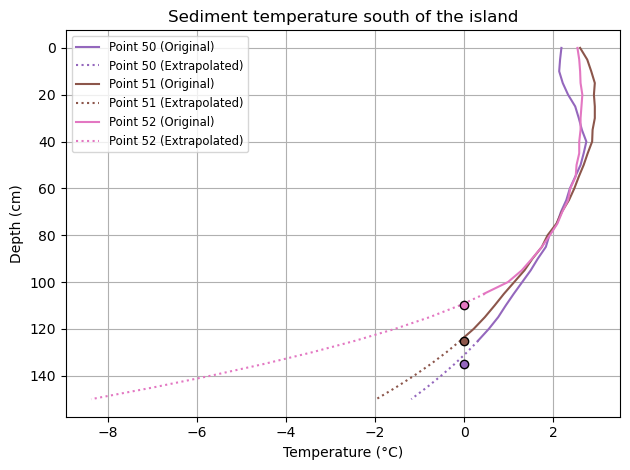

In [108]:
from scipy.interpolate import splrep, splev

for k in range(50, 53):
    df = events[k]
    x = df['depth_cm'].to_numpy()
    y = df['soilTemp_degC'].to_numpy()
    
    p = np.polyfit(x[-5:], y[-5:], deg=2)
    x_new = np.arange(df['depth_cm'].max(), 155, 5)
    y_new = np.polyval(p, x_new)
    
    x_newer = np.append(x,x_new)
    y_newer = np.append(y,y_new)

    plt.plot(y, x, label=f'Point {k} (Original)', linestyle='-', color=f"C{k-46}")
    
    plt.plot(y_new, x_new, label=f'Point {k} (Extrapolated)', linestyle=':', color=f"C{k-46}")  
    zero_crossings = np.where(np.diff(np.sign(y_newer)))[0]  
    zero_x_values = []
    
    for idx in zero_crossings:
        
        x_zero = np.interp(0, [y_newer[idx], y_newer[idx + 1]], [x_newer[idx], x_newer[idx + 1]])
        zero_x_values.append(x_zero)
    
    print(f"Station {k} - x values where y_newer=0: {zero_x_values}")
    
    
    for x_zero in zero_x_values:
        plt.scatter(0, x_zero, color=f"C{k-46}", edgecolor='black', zorder=5)  

ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (cm)')
#ax.set_xlim(-1, 4)
plt.title('Sediment temperature south of the island')
plt.legend(fontsize='small')
plt.tight_layout()
plt.grid(True)    